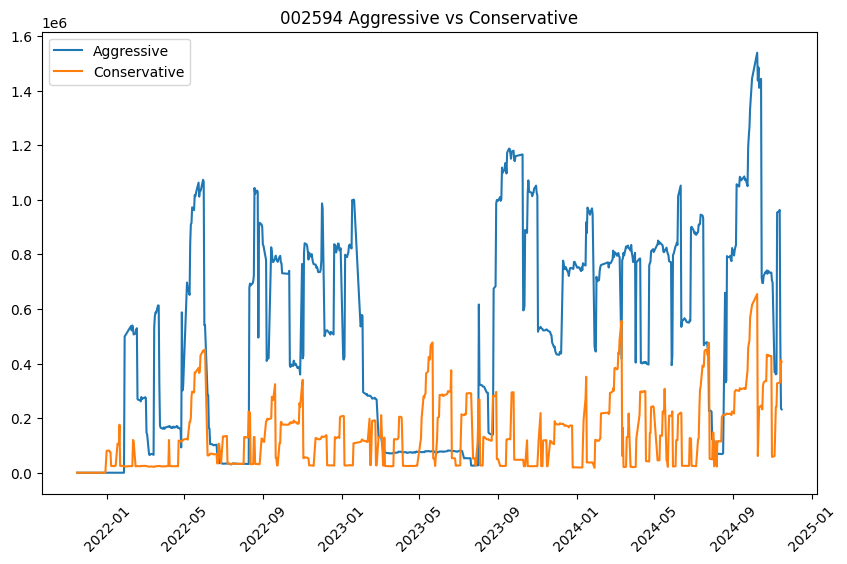

In [ ]:
# 持仓图对比
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

# 读取数据
code = '601857'
name = '中国石油'
aggressive = pd.read_csv(f'{code}_{name}_operation_aggressive.csv')
conservative = pd.read_csv(f'{code}_{name}_operation_conservative.csv')

# 提取出time和total_value列
aggressive = aggressive[['time', 'stock_value']]
conservative = conservative[['time', 'stock_value']]
# 将time列转换为日期格式
aggressive['time'] = pd.to_datetime(aggressive['time'])
conservative['time'] = pd.to_datetime(conservative['time'])
# 将aggressive和conservative画在一个折线图上
plt.figure(figsize=(10, 6))
plt.plot(aggressive['time'], aggressive['stock_value'], label='Aggressive')
plt.plot(conservative['time'], conservative['stock_value'], label='Conservative')
# 设置日期格式为按月显示
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # 自动选择合适的日期间隔
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 按 "年-月" 格式显示日期
plt.xticks(rotation=45)  # 旋转日期标签，避免重叠
plt.title(f'{code} Aggressive vs Conservative')
plt.savefig(f'{code}_{name}_aggressive_vs_conservative.png')
plt.legend()
plt.show()

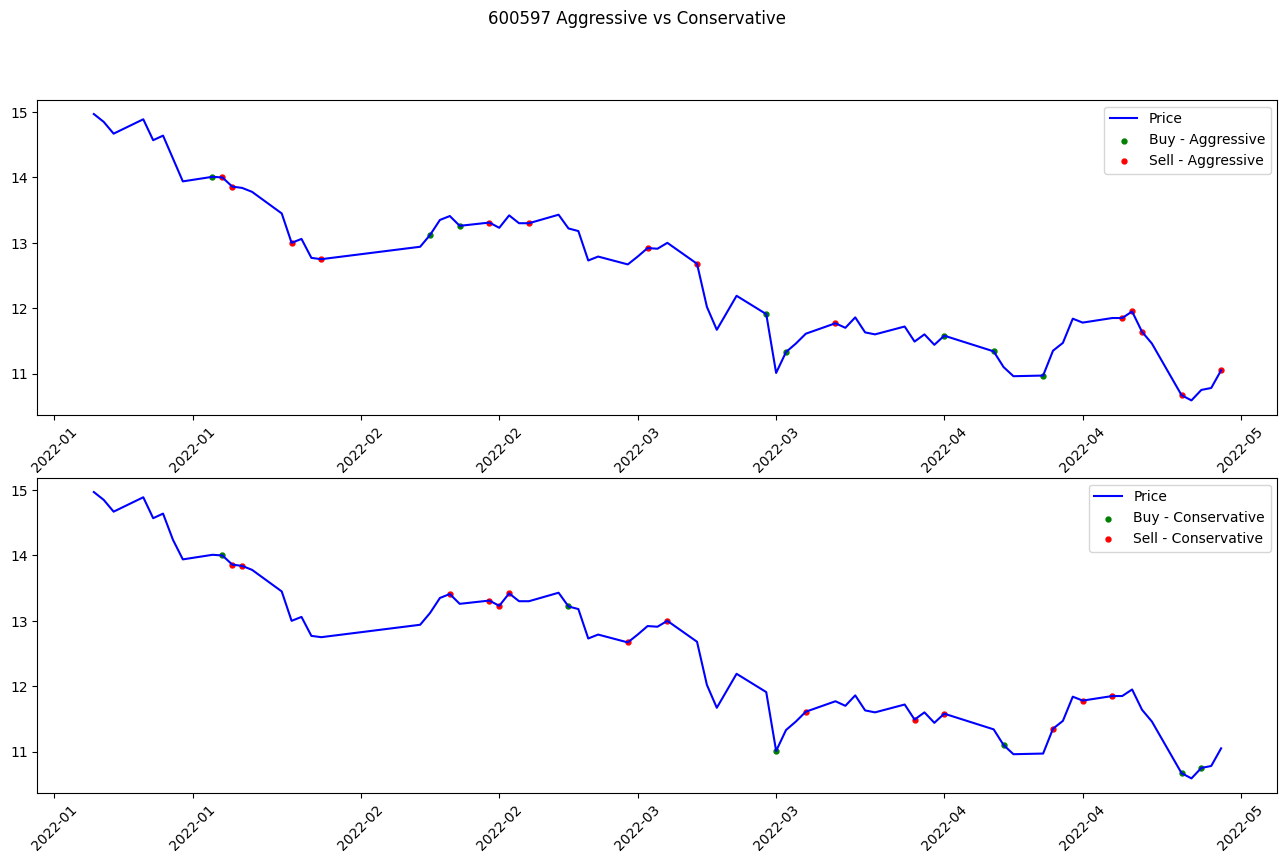

In [24]:
# 读取数据
aggressive = pd.read_csv(f'{code}_{name}_operation_aggressive.csv')
conservative = pd.read_csv(f'{code}_{name}_operation_conservative.csv')

# 取出time/action/price列
aggressive = aggressive[['time', 'action', 'price']]
conservative = conservative[['time', 'action', 'price']]

# 将time列转换为日期格式
aggressive['time'] = pd.to_datetime(aggressive['time'])
conservative['time'] = pd.to_datetime(conservative['time'])

# 股票价格用折线图 买入用绿色散点 卖出用红色散点 画在一个图上
# 需要对比aggressive和conservative的买卖情况 所以股票价格用折线图画在两个子图上
fig, ax = plt.subplots(2, 1, figsize=(16, 9))

# 绘制股票价格折线图
ax[0].plot(aggressive['time'], aggressive['price'], label='Price', color='blue')
ax[1].plot(conservative['time'], conservative['price'], label='Price', color='blue')

# 筛选买入和卖出操作
buy_aggressive = aggressive[aggressive['action'] == 'buy']
sell_aggressive = aggressive[aggressive['action'] == 'sell']
buy_conservative = conservative[conservative['action'] == 'buy']
sell_conservative = conservative[conservative['action'] == 'sell']

# 绘制买入和卖出散点图
# Aggressive 使用绿色和红色
ax[0].scatter(buy_aggressive['time'], buy_aggressive['price'], color='green', label='Buy - Aggressive', marker='.', s=50)
ax[0].scatter(sell_aggressive['time'], sell_aggressive['price'], color='red', label='Sell - Aggressive', marker='.', s=50)

# Conservative 使用绿色和红色
ax[1].scatter(buy_conservative['time'], buy_conservative['price'], color='green', label='Buy - Conservative', marker='.', s=50)
ax[1].scatter(sell_conservative['time'], sell_conservative['price'], color='red', label='Sell - Conservative', marker='.', s=50)

# 设置日期格式为按月显示
for i in range(2):
    ax[i].xaxis.set_major_locator(mdates.AutoDateLocator())  # 自动选择合适的日期间隔
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 按 "年-月" 格式显示日期
    ax[i].tick_params(axis='x', rotation=45)  # 旋转日期标签，避免重叠
    ax[i].legend()

# 添加标题
plt.suptitle(f'{code} Aggressive vs Conservative')

# 保存和显示图像
plt.savefig(f'{code}_{name}_aggressive_vs_conservative_scatter.png')
plt.show()

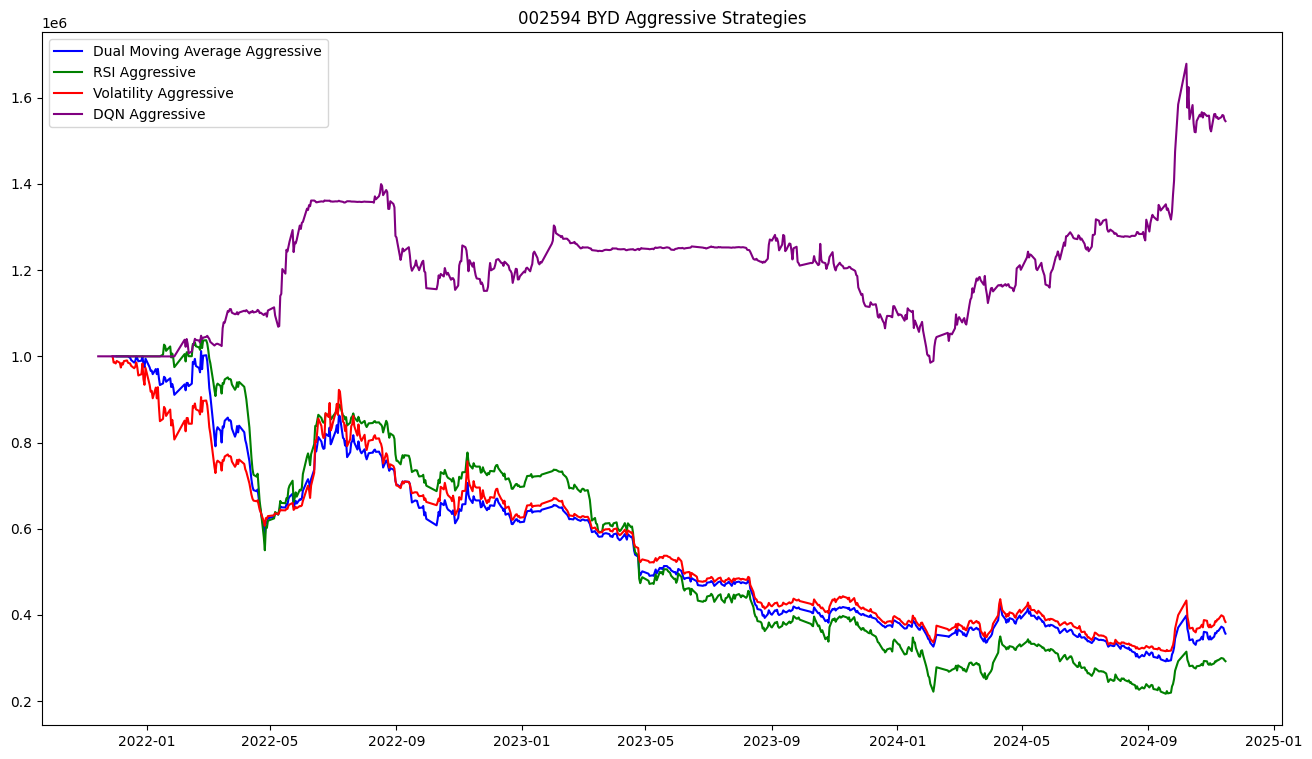

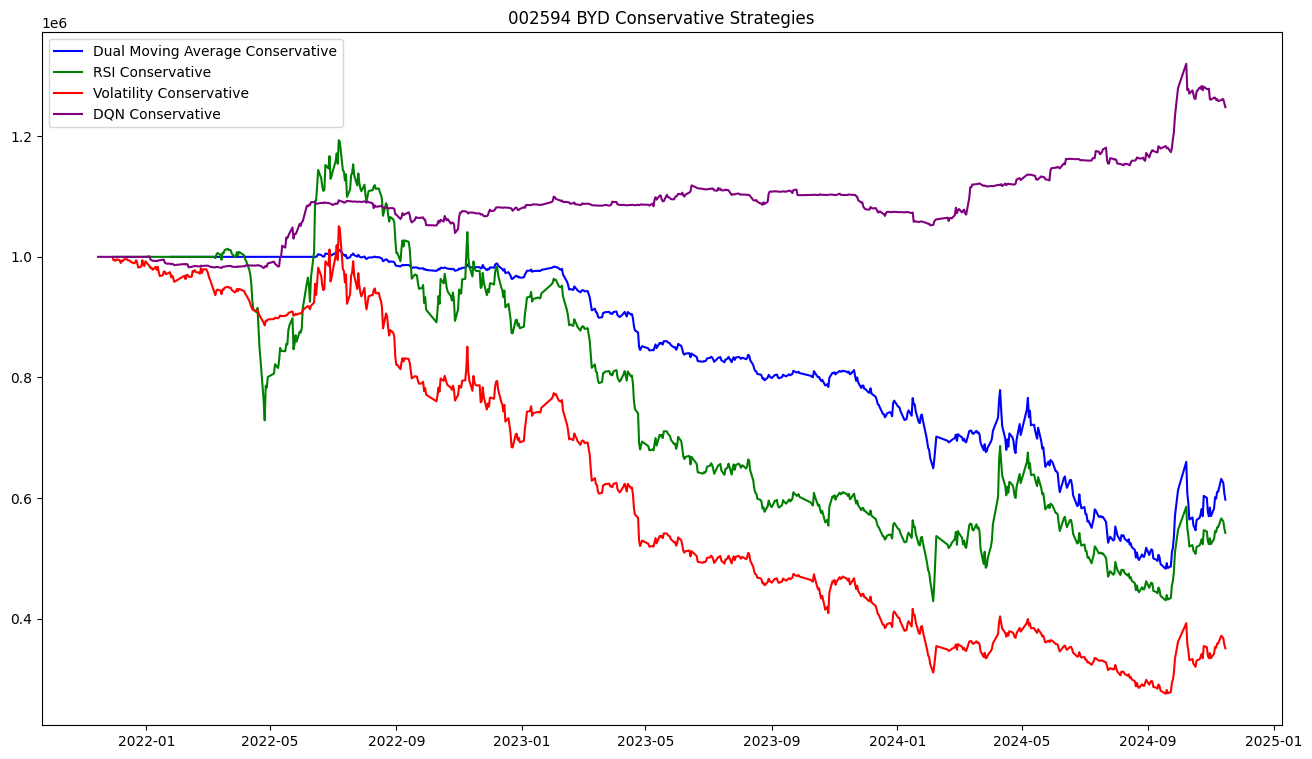

In [10]:
# 画出策略的总资产变化折线图    
# 读取数据
import matplotlib.pyplot as plt
import pandas as pd
DualMovingAverageAggressive = pd.read_csv('./DualMovingAverageAggressive_assets.csv')
DualMovingAverageConservative = pd.read_csv('./DualMovingAverageConservative_assets.csv')
RSIAggressive = pd.read_csv('./RSIAggressive_assets.csv')
RSIConservative = pd.read_csv('./RSIConservative_assets.csv')
VolatilityAggressive = pd.read_csv('./VolatilityAggressive_assets.csv')
VolatilityConservative = pd.read_csv('./VolatilityConservative_assets.csv')
DQNAggressive = pd.read_csv('./002594_比亚迪_operation_Aggressive.csv')
DQNConservative = pd.read_csv('./002594_比亚迪_operation_Conservative.csv')
# 取出time和total_value列
DQNAggressive = DQNAggressive[['time', 'total_value']]
DQNConservative = DQNConservative[['time', 'total_value']]

# 将time列转换为日期格式
DQNAggressive['time'] = pd.to_datetime(DQNAggressive['time'])
DQNConservative['time'] = pd.to_datetime(DQNConservative['time'])
# 将前六个策略的date列改名为time 并转化为日期格式
DualMovingAverageAggressive['time'] = pd.to_datetime(DualMovingAverageAggressive['date'])
DualMovingAverageConservative['time'] = pd.to_datetime(DualMovingAverageConservative['date'])
RSIAggressive['time'] = pd.to_datetime(RSIAggressive['date'])
RSIConservative['time'] = pd.to_datetime(RSIConservative['date'])
VolatilityAggressive['time'] = pd.to_datetime(VolatilityAggressive['date'])
VolatilityConservative['time'] = pd.to_datetime(VolatilityConservative['date'])

# 每四个策略画在一个图上 Aggressive和Conservative分开画
# 第一组: Dual Moving Average Aggressive | RSI Aggressive | Volatility Aggressive | DQN Aggressive
plt.figure(figsize=(16, 9))
plt.plot(DualMovingAverageAggressive['time'], DualMovingAverageAggressive['total_value'], label='Dual Moving Average Aggressive', color='blue')
plt.plot(RSIAggressive['time'], RSIAggressive['total_value'], label='RSI Aggressive', color='green')
plt.plot(VolatilityAggressive['time'], VolatilityAggressive['total_value'], label='Volatility Aggressive', color='red')
plt.plot(DQNAggressive['time'], DQNAggressive['total_value'], label='DQN Aggressive', color='purple')
plt.title('002594 BYD Aggressive Strategies')
plt.legend()
plt.savefig('002594 BYD Aggressive_Strategies.png')
plt.show()

# 第二组: Dual Moving Average Conservative | RSI Conservative | Volatility Conservative | DQN Conservative
plt.figure(figsize=(16, 9))
plt.plot(DualMovingAverageConservative['time'], DualMovingAverageConservative['total_value'], label='Dual Moving Average Conservative', color='blue')
plt.plot(RSIConservative['time'], RSIConservative['total_value'], label='RSI Conservative', color='green')
plt.plot(VolatilityConservative['time'], VolatilityConservative['total_value'], label='Volatility Conservative', color='red')
plt.plot(DQNConservative['time'], DQNConservative['total_value'], label='DQN Conservative', color='purple')
plt.title('002594 BYD Conservative Strategies')
plt.legend()
plt.savefig('002594 BYD Conservative_Strategies.png')
plt.show()


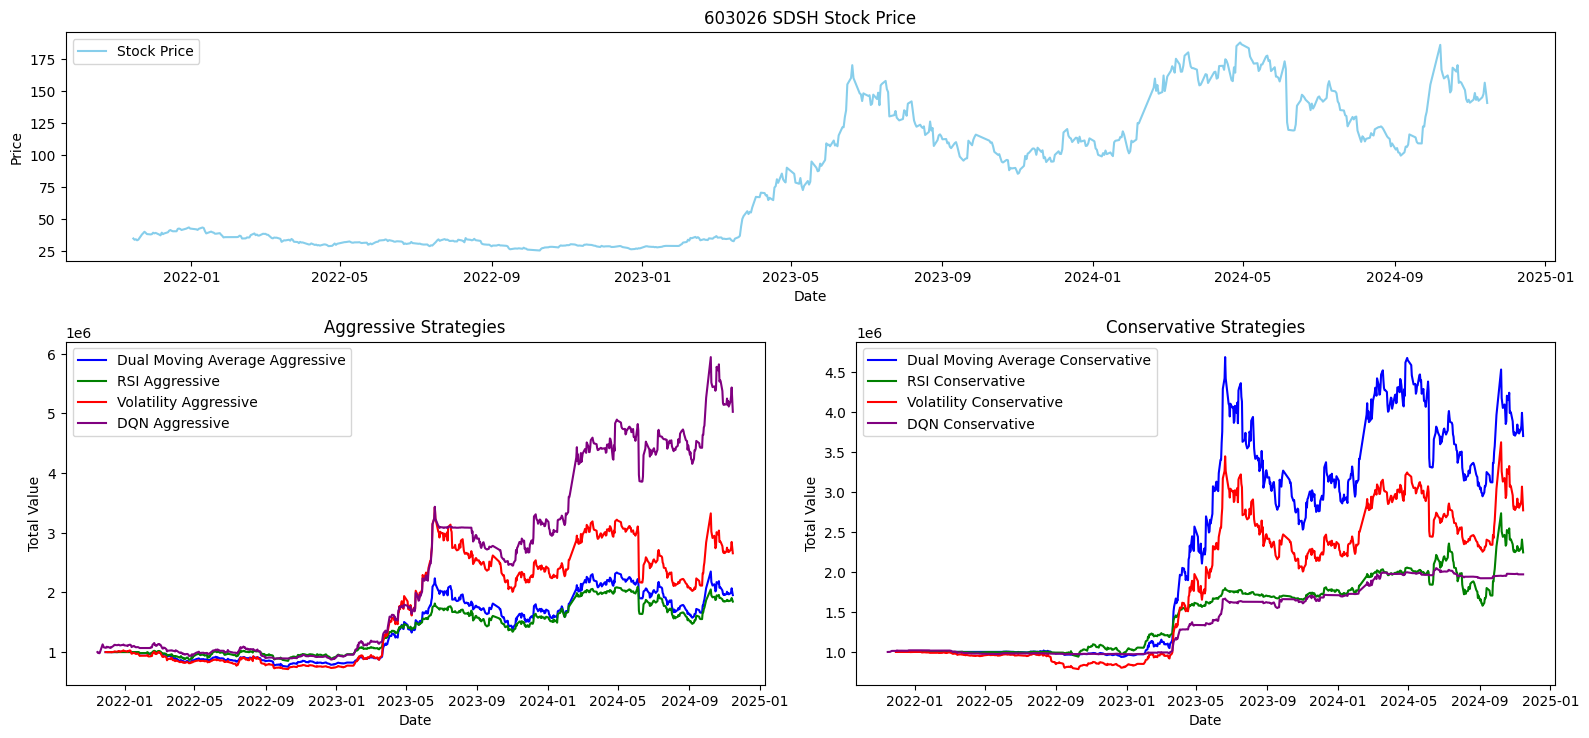

In [21]:
# 上面部分子图画出 股价
# 下面部分画出各种策略随着时间的总资产变化
# 读取数据
import matplotlib.pyplot as plt
import pandas as pd
# 读取数据
DualMovingAverageAggressive = pd.read_csv('results/DualMovingAverageAggressive_assets.csv')
DualMovingAverageConservative = pd.read_csv('results/DualMovingAverageConservative_assets.csv')
RSIAggressive = pd.read_csv('results/RSIAggressive_assets.csv')
RSIConservative = pd.read_csv('results/RSIConservative_assets.csv')
VolatilityAggressive = pd.read_csv('results/VolatilityAggressive_assets.csv')
VolatilityConservative = pd.read_csv('results/VolatilityConservative_assets.csv')
DQNAggressive = pd.read_csv('./300308_中际旭创_operation_Aggressive.csv')
DQNConservative = pd.read_csv('./300308_中际旭创_operation_Conservative.csv')

# 取出time和total_value列
DQNAggressive = DQNAggressive[['time', 'total_value','price']]
DQNConservative = DQNConservative[['time', 'total_value','price']]

# 将time列转换为日期格式
DQNAggressive['time'] = pd.to_datetime(DQNAggressive['time'])
DQNConservative['time'] = pd.to_datetime(DQNConservative['time'])

# 将前六个策略的date列改名为time 并转化为日期格式
DualMovingAverageAggressive['time'] = pd.to_datetime(DualMovingAverageAggressive['date'])
DualMovingAverageConservative['time'] = pd.to_datetime(DualMovingAverageConservative['date'])
RSIAggressive['time'] = pd.to_datetime(RSIAggressive['date'])
RSIConservative['time'] = pd.to_datetime(RSIConservative['date'])
VolatilityAggressive['time'] = pd.to_datetime(VolatilityAggressive['date'])
VolatilityConservative['time'] = pd.to_datetime(VolatilityConservative['date'])

# 创建图表并使用 gridspec 来布局
fig = plt.figure(figsize=(16, 9))
gs = fig.add_gridspec(3, 2, height_ratios=[2, 3, 1])

# 上面部分：股价（占据两列）
ax0 = fig.add_subplot(gs[0, :])
ax0.plot(DQNAggressive['time'], DQNAggressive['price'], label='Stock Price', color='skyblue')
ax0.set_title('603026 SDSH Stock Price')
ax0.set_xlabel('Date')
ax0.set_ylabel('Price')
ax0.legend()

# 下面部分：资产变化（左侧：Aggressive策略，右侧：Conservative策略）
ax1 = fig.add_subplot(gs[1, 0])
ax1.plot(DualMovingAverageAggressive['time'], DualMovingAverageAggressive['total_value'], label='Dual Moving Average Aggressive', color='blue')
ax1.plot(RSIAggressive['time'], RSIAggressive['total_value'], label='RSI Aggressive', color='green')
ax1.plot(VolatilityAggressive['time'], VolatilityAggressive['total_value'], label='Volatility Aggressive', color='red')
ax1.plot(DQNAggressive['time'], DQNAggressive['total_value'], label='DQN Aggressive', color='purple')
ax1.set_title('Aggressive Strategies')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Value')
ax1.legend()

ax2 = fig.add_subplot(gs[1, 1])
ax2.plot(DualMovingAverageConservative['time'], DualMovingAverageConservative['total_value'], label='Dual Moving Average Conservative', color='blue')
ax2.plot(RSIConservative['time'], RSIConservative['total_value'], label='RSI Conservative', color='green')
ax2.plot(VolatilityConservative['time'], VolatilityConservative['total_value'], label='Volatility Conservative', color='red')
ax2.plot(DQNConservative['time'], DQNConservative['total_value'], label='DQN Conservative', color='purple')
ax2.set_title('Conservative Strategies')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Value')
ax2.legend()

# 调整子图之间的间距
plt.tight_layout()

# 保存图像
plt.savefig('603026_SDSH_Strategies.png')
plt.show()

